In [38]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [9]:
df = pd.read_csv('train.tsv', sep = '\t')
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


## Preprocessing

In [11]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [12]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

In [16]:
df['cleaned_phrase'] = df['Phrase'].apply(preprocess_text)

In [21]:
df[['Phrase', 'cleaned_phrase']].head()

,Phrase,cleaned_phrase
0,A series of escapades demonstrating the adage ...,series escapade demonstrating adage good goose...
1,A series of escapades demonstrating the adage ...,series escapade demonstrating adage good goose
2,A series,series
3,A,
4,series,series


## Splitting Data 

In [24]:
X = df['cleaned_phrase']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

## TFIDF

In [25]:
vectorizer = TfidfVectorizer()

In [26]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [29]:
X_train_tfidf.shape

(132651, 14716)

## Linear SVM

In [31]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [32]:
y_pred = svm_model.predict(X_test_tfidf)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.21      0.31      1082
           1       0.53      0.43      0.48      4198
           2       0.68      0.85      0.76     11696
           3       0.57      0.51      0.53      4999
           4       0.66      0.23      0.34      1434

    accuracy                           0.63     23409
   macro avg       0.61      0.45      0.48     23409
weighted avg       0.62      0.63      0.61     23409



In [39]:
cm = confusion_matrix(y_test, y_pred)


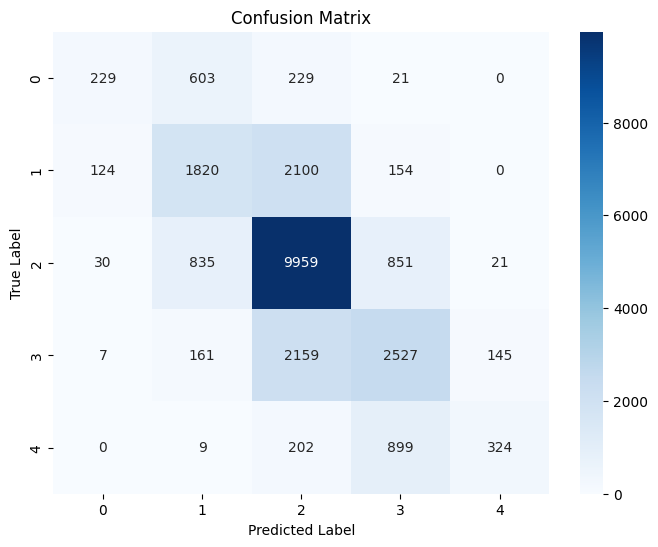

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()